In [9]:
#Samarth Borade
#C009
#BTI SEM 10
#EXP 7: Learning rate and optimizers

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import ssl


ssl._create_default_https_context = ssl._create_unverified_context

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Encoding the classes using one hot encoder
one_hot_encoder = OneHotEncoder(sparse=False)
y_train_encoded = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = one_hot_encoder.transform(y_test.reshape(-1, 1))

# Normalize the features
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:

# Building the convolutional network model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Print the summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape data for CNN
x_train_reshaped = np.expand_dims(x_train_normalized, axis=-1)
x_test_reshaped = np.expand_dims(x_test_normalized, axis=-1)

# Train the model
history_cnn = model.fit(x_train_reshaped, y_train_encoded, epochs=5, batch_size=64, validation_split=0.1)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [12]:
# Building LeNet-5 architecture
model_lenet5 = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

# Print the summary
model_lenet5.summary()

# Compile the model
model_lenet5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_lenet5 = model_lenet5.fit(x_train_reshaped, y_train_encoded, epochs=5, batch_size=64, validation_split=0.1)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 120)              

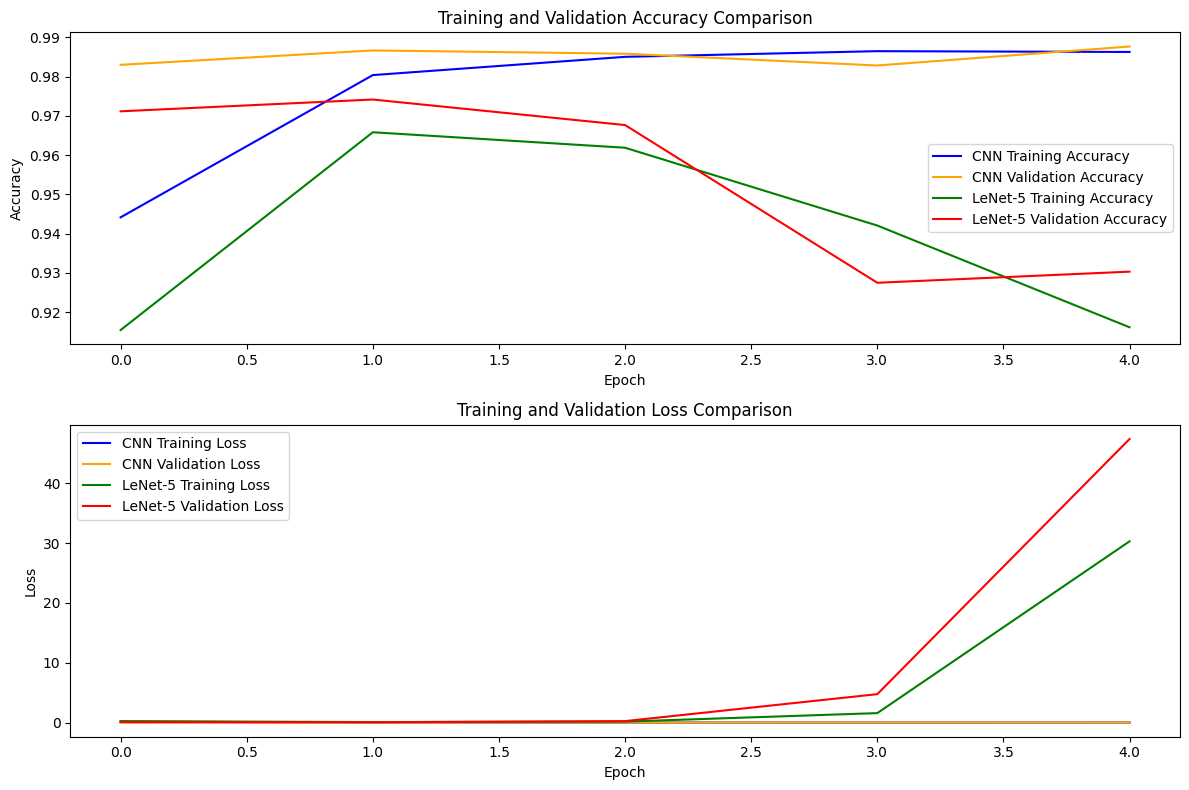

In [13]:

# Plotting the training and validation accuracy for CNN and LeNet-5
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy', color='blue')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy', color='orange')
plt.plot(history_lenet5.history['accuracy'], label='LeNet-5 Training Accuracy', color='green')
plt.plot(history_lenet5.history['val_accuracy'], label='LeNet-5 Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()

# Plotting the training and validation loss for CNN and LeNet-5
plt.subplot(2, 1, 2)
plt.plot(history_cnn.history['loss'], label='CNN Training Loss', color='blue')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss', color='orange')
plt.plot(history_lenet5.history['loss'], label='LeNet-5 Training Loss', color='green')
plt.plot(history_lenet5.history['val_loss'], label='LeNet-5 Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend()

plt.tight_layout()
plt.show()
